In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import torch
import torchvision
import numpy as np
import cv2
import uuid
import re


In [21]:
!git clone https://github.com/ultralytics/yolov5

!cd yolov5 & pip install  -r requirements.txt

## Training model

In [ ]:
!cd yolov5 && python train.py --img 640 --batch 24 --epochs 50 --data data.yaml --weights yolov5s.pt --workers 4 --lr 0.001

## Loading model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp5/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\w1mug/.cache\torch\hub\master.zip
YOLOv5  2024-7-23 Python-3.8.19 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Testing

In [12]:

img = "C:/Users/w1mug/study materials/data science/projects/helmet detection/dataset/test/images/overload-100-_jpg.rf.2cbde3fa231476ee28c74618e89bbfca.jpg"

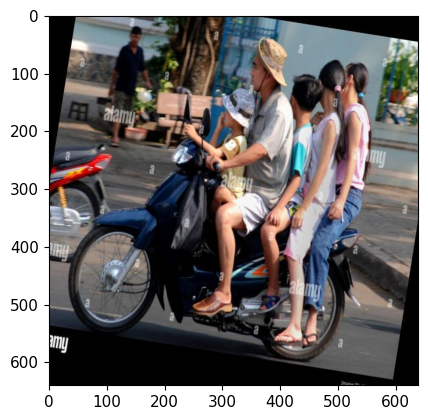

In [11]:
# Read the image
image = cv2.imread(img)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [6]:
results = model(img)

In [8]:
results.print()

image 1/1: 640x640 4 persons, 1 rider_without_helmet
Speed: 12.0ms pre-process, 12.6ms inference, 125.2ms NMS per image at shape (1, 3, 640, 640)


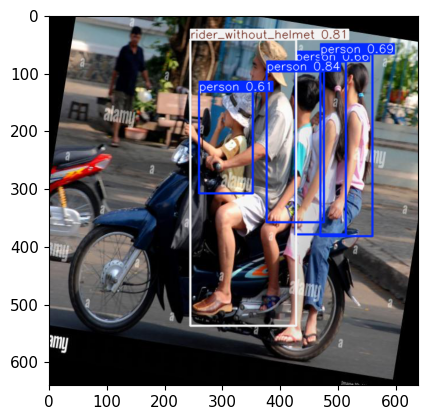

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

#### Realtime detection on Video or Web-cam

In [30]:
import cv2
import uuid

cap = cv2.VideoCapture("C:/Users/w1mug/Downloads/india-hyderabad-january-2021-side-view-of-vehicles-running-on-road-footage-of--SBV-346392051-preview.mp4")
# cap = cv2.VideoCapture(0)
# Define the new window size
window_width = 800
window_height = 600

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab a frame")
        break  # Exit the loop if no frame is grabbed
    
    # Resize the frame
    resized_frame = cv2.resize(frame, (window_width, window_height))
    
    # Make detections 
    results = model(resized_frame)

    # Convert results to pandas dataframe
    results_df = results.pandas().xywh[0]

    # Initialize counts
    persons_count = 0
    rider_without_helmet_count = 0
    rider_with_helmet_count = 0

    # Iterate over the detections to count the objects
    for _, row in results_df.iterrows():
        if row['name'] == 'person':
            persons_count += 1
        elif row['name'] == 'rider_without_helmet':
            rider_without_helmet_count += 1
        elif row['name'] == 'rider_with_helmet':
            rider_with_helmet_count += 1
    
    image_name = str(uuid.uuid4()) + ".jpg"
    save_path = f"C:/Users/w1mug/study materials/data science/projects/helmet detection/detected_images/{image_name}"

    # Apply conditions
    if rider_without_helmet_count > 0 or persons_count > 2:
        # Save the frame
        cv2.imwrite(save_path, frame)
    
    
    # Render detections on the resized frame
    rendered_frame = np.squeeze(results.render())
    
    # Display the resized and rendered frame
    cv2.imshow('YOLO', rendered_frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Failed to grab a frame


On image

In [20]:
import cv2
import uuid
import numpy as np
import re
import torch

# Load the image
image_path = "C:/Users/w1mug/Downloads/CrossWalk_(5465840138).jpg"
frame = cv2.imread(image_path)

# Define the new window size
window_width = 800
window_height = 600

# Resize the frame
resized_frame = cv2.resize(frame, (window_width, window_height))

# Make detections
results = model(resized_frame)

# Convert results to pandas dataframe
results_df = results.pandas().xywh[0]

# Initialize counts
persons_count = 0
rider_without_helmet_count = 0
rider_with_helmet_count = 0

# Iterate over the detections to count the objects
for _, row in results_df.iterrows():
    if row['name'] == 'person':
        persons_count += 1
    elif row['name'] == 'rider_without_helmet':
        rider_without_helmet_count += 1
    elif row['name'] == 'rider_with_helmet':
        rider_with_helmet_count += 1

image_name = str(uuid.uuid4()) + ".jpg"
save_path = f"C:/Users/w1mug/study materials/data science/projects/helmet detection/detected_images/{image_name}"

# Apply conditions
if rider_without_helmet_count > 0 or persons_count > 2:
    # Save the frame
    cv2.imwrite(save_path, frame)

# Render detections on the resized frame
rendered_frame = np.squeeze(results.render())

# Display the resized and rendered frame
cv2.imshow('YOLO', rendered_frame)

cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()
